In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'telco_customer_churn.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check dataset info
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check basic statistics
print("\nDataset Statistics:")
print(data.describe())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for and handle missing values in 'TotalCharges' after conversion
print("Missing values in 'TotalCharges' after conversion:", data['TotalCharges'].isnull().sum())
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Step 2: Encode categorical variables
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Apply Label Encoding
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Step 3: Scale numerical features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 4: Drop customerID
data.drop('customerID', axis=1, inplace=True)

# Display the processed data
print("\nProcessed Data (First 5 rows):")
print(data.head())

Missing values in 'TotalCharges' after conversion: 11

Processed Data (First 5 rows):
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract

In [5]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (5634, 19)
Testing Features Shape: (1409, 19)
Training Labels Shape: (5634,)
Testing Labels Shape: (1409,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Evaluate the model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_prob))

Logistic Regression Evaluation:
Accuracy: 0.8161816891412349

Confusion Matrix:
 [[933 103]
 [156 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


AUC-ROC Score: 0.8614088523605951



Feature Importance:
             Feature  Coefficient  Importance
4             tenure    -1.314728    1.314728
5       PhoneService    -1.020790    1.020790
14          Contract    -0.725606    0.725606
17    MonthlyCharges     0.667266    0.667266
18      TotalCharges     0.597321    0.597321
15  PaperlessBilling     0.356098    0.356098
8     OnlineSecurity    -0.292833    0.292833
11       TechSupport    -0.256394    0.256394
7    InternetService     0.229450    0.229450
3         Dependents    -0.181464    0.181464
1      SeniorCitizen     0.181025    0.181025
9       OnlineBackup    -0.155019    0.155019
10  DeviceProtection    -0.081990    0.081990
6      MultipleLines     0.071496    0.071496
2            Partner     0.066770    0.066770
16     PaymentMethod     0.058197    0.058197
0             gender    -0.052050    0.052050
13   StreamingMovies     0.036120    0.036120
12       StreamingTV    -0.013465    0.013465


<function matplotlib.pyplot.show(close=None, block=None)>

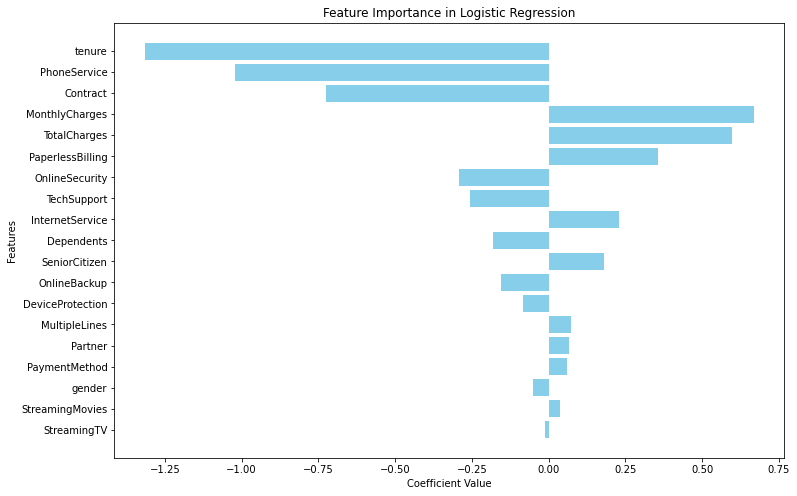

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Map feature names to coefficients
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Add absolute importance for sorting
importance_df['Importance'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("\nFeature Importance:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()
plt.show